In [81]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import re

In [53]:
from konlpy.tag import Okt, Kkma
from collections import Counter

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [ ]:
# 블로그 본문 데이터프레임에 Spot열 만들어서 장소 붙이기
review = pd.read_csv('data/관광지_리뷰.csv')
spots = list(review[review['Region'] == '경상북도'].Spots)
a = pd.read_csv('region/경상북도.csv')
a['Spots'] = pd.qcut(range(len(a)), q=75, labels=spots)

In [32]:
# 장소컬럼까지 붙인 파일 불러오기
df = pd.read_csv('result_blog/강원도(장소포함).csv')

In [60]:
경북 = pd.read_csv('result_blog/경북spots.csv')
경북.drop(columns = 'Unnamed: 0', inplace=True)

In [61]:
경북.columns = ['Texts','Spots']

In [62]:
# 한국어_불용어_목록
sw = pd.read_csv('데이터/한국어_불용어_목록.csv')

In [82]:
# 이모지 제외하고 나머지만 추출하기
def txt_without_emoji(df,spot):
    contents = list(df[df.Spots==spot].Texts)
    contents =  ' '.join(str(item) for item in contents)
    cleaned_text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z0-9\s]', '', contents)
    return cleaned_text

In [84]:
texts = txt_without_emoji(경북,'경주월드')

In [110]:
def top_words(texts):
    okt=Okt()
    nouns = okt.nouns(texts)
    nouns2 = [word for word in nouns if len(word) > 1]
    kor_sw = list(np.hstack(sw.values))
    nouns3 = [noun for noun in nouns2 if noun not in kor_sw]
    nouns_cnt = Counter(nouns3)
    tokens_df = pd.DataFrame(pd.Series(nouns_cnt), columns=['Freq'])
    sorted_df = tokens_df.sort_values(by='Freq',ascending=False)
    top_df = sorted_df.iloc[:20]
    sns.barplot(data = top_df, x='Freq', y= top_df.index)
    plt.title('상위20개 단어빈도')
    plt.show()

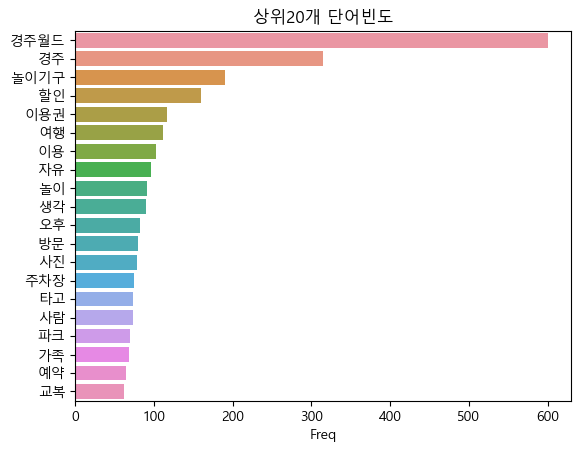

In [111]:
top_words(texts)

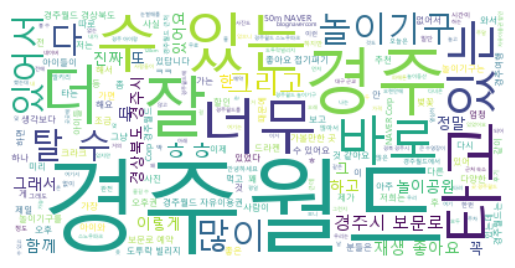

In [112]:
# 워드클라우드
font_path = 'C:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(background_color='white', font_path=font_path).generate(texts)

plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear') 
plt.show()

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [116]:
# 관광지명 
place = pd.read_csv('관광지_리뷰.csv')
spots = list(place[place['Region']=='경상북도']['Spots'])

In [134]:
# 여행지별 본문 내용을 하나로 합치기
contents = []
for spot in spots:
    texts = txt_without_emoji(경북,spot)
    contents.append(list(texts))

In [135]:
#각 여행지별 텍스트를 데이터로 갖는 데이터프레임 생성
def df_75(contents):
    data = []
    for i in range(75):
        c = ''.join(contents[i])
        data.append([c])
    df = pd.DataFrame(data,columns = ['contents'])
    return df


In [136]:
contents_df = df_75(contents)
contents_df

,contents
0,벚꽃 하면 가장 먼저 떠오르는 곳 경주\n올봄 벚꽃 구경을 어디서 할까 고민하다가 ...
1,꽃구경 다니는 앙꼬쌤입니다\n대구포항버스여행 다녀왔어요\n대구출발 당일치기 포항버스...
2,경주 가볼만한곳 안압지동궁과월지\n경주김씨 진안군 종친회 선조왕릉 참배를 마치고\n...
3,황남관\n안녕하세요 무늉입니다 \n최근에 경주여행으로 1박2일 짧게 다녀왔는데요\n...
4,Pohang Skywalk\n포항 해상 스카이워크 영일만 북파랑길 볼거리\n안녕하세...
...,...
70,경주 보문단지 보문호 대형카페\n아덴\n내돈내산\n20240326\n보문호수 근처에...
71,3월이 시작되자 강추위가 몰려왔네요\n저는 이 강추위에 청송에 여행을 갔는데요\n정...
72,50m\n NAVER Corp\n나정고운모래해변 오토캠핑장\n경상북도 경주시 감포읍...
73,경주 감은사지 동서 삼층석탑\n국보 제112호\n무료주차\n무료입장\n보존처리로 인...


In [137]:
# contents_df에 spots 열 추가하기
contents_df['spots'] = spots

In [138]:
contents_df

,contents,spots
0,벚꽃 하면 가장 먼저 떠오르는 곳 경주\n올봄 벚꽃 구경을 어디서 할까 고민하다가 ...,경주월드
1,꽃구경 다니는 앙꼬쌤입니다\n대구포항버스여행 다녀왔어요\n대구출발 당일치기 포항버스...,스페이스워크
2,경주 가볼만한곳 안압지동궁과월지\n경주김씨 진안군 종친회 선조왕릉 참배를 마치고\n...,동궁과월지
3,황남관\n안녕하세요 무늉입니다 \n최근에 경주여행으로 1박2일 짧게 다녀왔는데요\n...,황리단길
4,Pohang Skywalk\n포항 해상 스카이워크 영일만 북파랑길 볼거리\n안녕하세...,포항해상스카이워크
...,...,...
70,경주 보문단지 보문호 대형카페\n아덴\n내돈내산\n20240326\n보문호수 근처에...,보문호
71,3월이 시작되자 강추위가 몰려왔네요\n저는 이 강추위에 청송에 여행을 갔는데요\n정...,주왕산
72,50m\n NAVER Corp\n나정고운모래해변 오토캠핑장\n경상북도 경주시 감포읍...,나정고운모래해변
73,경주 감은사지 동서 삼층석탑\n국보 제112호\n무료주차\n무료입장\n보존처리로 인...,감은사지삼층석탑


In [139]:
# tfidf
tfidf = TfidfVectorizer()
ftr_mat1 = tfidf.fit_transform(contents_df['contents'])

In [140]:
# 유사도 검사
cosine_sim = cosine_similarity(ftr_mat1, ftr_mat1)
cosine_sim

array([[1.        , 0.07145897, 0.13884372, ..., 0.12058574, 0.09098087,
        0.08225591],
       [0.07145897, 1.        , 0.07749326, ..., 0.08352462, 0.06249984,
        0.31571799],
       [0.13884372, 0.07749326, 1.        , ..., 0.17338779, 0.16971077,
        0.07890969],
       ...,
       [0.12058574, 0.08352462, 0.17338779, ..., 1.        , 0.15093718,
        0.12942712],
       [0.09098087, 0.06249984, 0.16971077, ..., 0.15093718, 1.        ,
        0.07712985],
       [0.08225591, 0.31571799, 0.07890969, ..., 0.12942712, 0.07712985,
        1.        ]])

In [141]:
# 여행지와 인덱스 사전 만들기
title_to_index = dict(zip(contents_df['spots'], contents_df.index))
title_to_index['경주월드']

0

In [142]:
# 유사도 높은 여행지 추출
def get_recommend(place, cosine_sim, n=10):
    idx = title_to_index[place]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores_top = sorted(sim_scores, key=lambda x:x[1], reverse=True)[1:n+1] 
    indices = [item[0] for item in sim_scores_top]
    return contents_df['spots'].iloc[indices]

In [143]:
get_recommend('경주월드',cosine_sim)

9     경주보문관광단지
70         보문호
6          첨성대
3         황리단길
16         월정교
12         대릉원
62         보문정
61      경주버드파크
40       경주동궁원
27     경주문무대왕릉
Name: spots, dtype: object

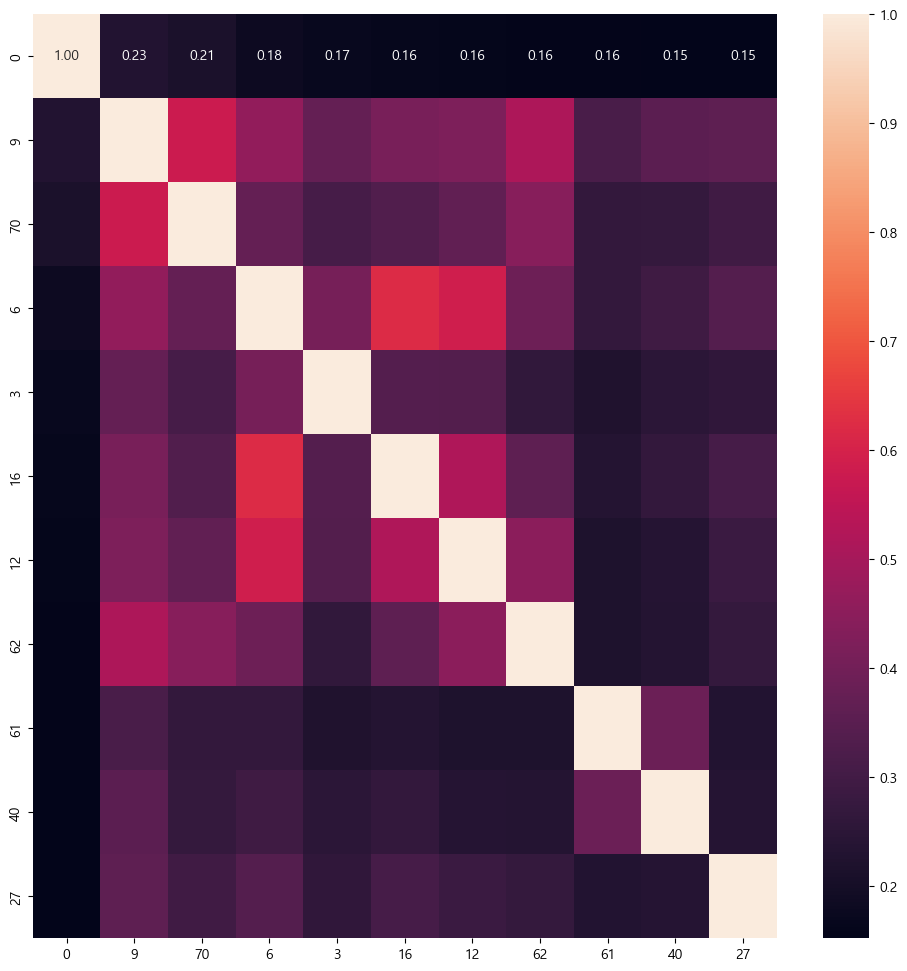

In [144]:
place = '경주월드'
n=10
sel_idx = title_to_index[place]

top_n_idx = get_recommend(place, cosine_sim,n).index

place_idx = [sel_idx] + list(top_n_idx)
place_idx
cos_sim = cosine_similarity(ftr_mat1[place_idx], ftr_mat1[place_idx])

plt.figure(figsize=(12,12))
sns.heatmap(cos_sim, annot=True, fmt='.2f', xticklabels=place_idx, yticklabels=place_idx)
plt.show()

In [145]:
# 데이터프레임으로 만들기
place = '경주월드'
n=10
sel_idx = title_to_index[place]

place_info = get_recommend(place, cosine_sim, n)
spot = place_info.values
place_idx = [sel_idx] + list(place_info.index)
cos_sim = cosine_similarity(ftr_mat1[place_idx], ftr_mat1[place_idx])
sim = cos_sim[0][1:]

df = pd.DataFrame(sim, index=spot, columns=['similarity'])
df

,similarity
경주보문관광단지,0.230565
보문호,0.212902
첨성대,0.179933
황리단길,0.169374
월정교,0.163017
대릉원,0.158824
보문정,0.157245
경주버드파크,0.157153
경주동궁원,0.153653
경주문무대왕릉,0.151955


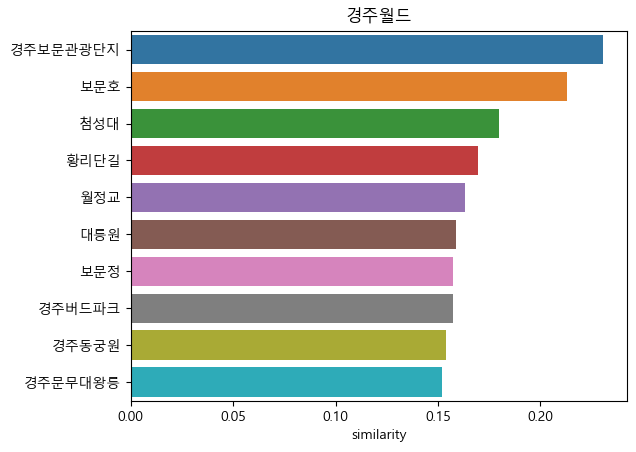

In [146]:
sns.barplot(data = df, x='similarity', y=df.index)
plt.title(f'{place}')
plt.show()